# <center>Pertussis Vaccination in Pregnancy</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from openpyxl import load_workbook
#workbook = load_workbook(filename="F:\Seagate Backup Plus Drive/Test1.xlsx")
workbook = load_workbook(filename="G:\Funding Team\Planning\Health Information\HIAT\Michael Files\Antinatal Vaccination\April 2019 to March 2020\For Python.xlsx")
#sheet.active = 1
sheet3 = workbook["Text"]
#sheet3['A1'].value
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd(sheet3['A1'].value)


Coverage report to 31st of March 2020

In [2]:
sheet3['A3'].value

'This following summary assesses pertussis vaccination coverage in women giving birth in the 12 months to the 31st of March 2020 with DHB level trends from January 2016.  National Health Index Numbers (NHI) of women giving birth in Auckland District Health Board (DHB), Counties Manukau DHB or Waitematā DHB hospitals were matched to completed vaccination data held on the National Immunisation Register (NIR).  A pertussis vaccination is counted as being received if the vaccination was given within 28 weeks prior to giving birth. Vaccinations that were given but not entered into the NIR will not be included also vaccinations given overseas or by providers outside of the Auckland Metro Region may also not be included.'

## Coverage by District Health Board

In [5]:
sheet3['A5'].value

'The highest vaccination coverage rates (12 month period) are seen among Women domiciled in Auckland DHB (60.9%), followed by Waitematā DHB (54.8%) and Counties Manukau DHB (42.8%). The below graph is coverage by month of birth.'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#Pertussis Tables
#DHBAll = pd.read_excel('G:/Funding Team/Planning/Health Information/HIAT/Michael Files/Antinatal Vaccination\April 2019 to March 2020/For Python.xlsx', 
                     #header=None, skiprows=7)
DHBAll = pd.ExcelFile('G:/Funding Team/Planning/Health Information/HIAT/Michael Files/Antinatal Vaccination/April 2019 to March 2020/For Python.xlsx')
DHBPert = pd.read_excel(DHBAll, 'Pertussis Graphs', skiprows=5)
DHB3 = DHBPert[['Counties_Manukau','Auckland','Waitemata']]

DHB3=DHB3.round(3)
# Declare a list that is to be converted into a column 
Monthly = ['Jan_16', 'Feb_16', 'Mar_16', 'Apr_16','May_16', 'Jun_16', 'Jul_16', 'Aug_16','Sep_16', 'Oct_16', 'Nov_16', 'Dec_16',
           'Jan_17', 'Feb_17', 'Mar_17', 'Apr_17','May_17', 'Jun_17', 'Jul_17', 'Aug_17','Sep_17', 'Oct_17', 'Nov_17', 'Dec_17',
           'Jan_18', 'Feb_18', 'Mar_18', 'Apr_18','May_18', 'Jun_18', 'Jul_18', 'Aug_18','Sep_18', 'Oct_18', 'Nov_18', 'Dec_18',
           'Jan_19', 'Feb_19', 'Mar_19', 'Apr_19','May_19', 'Jun_19', 'Jul_19', 'Aug_19','Sep_19', 'Oct_19', 'Nov_19', 'Dec_19',
           'Jan_20', 'Feb_20', 'Mar_20', 'Apr_20','May_20', 'Jun_20', 'Jul_20', 'Aug_20','Sep_20', 'Oct_20', 'Nov_20', 'Dec_20'] 

# Using 'Address' as the column name 
# and equating it to the list 
DHB3['Monthly'] = Monthly 
DHB3=DHB3.dropna()
random_x = DHB3["Monthly"].tolist()
# using to_numpy() 
random_y0 = DHB3['Counties_Manukau'].tolist()   

random_y1 = DHB3['Auckland'].tolist()  

random_y2 = DHB3['Waitemata'].tolist()   


#import numpy as np

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines+markers',
                    name='Counties_Manukau'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='Auckland'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                   mode='lines+markers',
                    name='Waitemata'))

# Edit the layout
#fig.update_layout(title='Pertusiss by Ethnicity',
                   #xaxis_title='Quarter',
                   #yaxis_title='Percentage')

fig.update_layout(xaxis_type='category',
                  title_text='Pertusiss by DHB',
                  xaxis_title='Monthly',
                  yaxis_title='Percentage')
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickformat="%")
#fig.update_layout(legend_orientation="h")
fig.update_layout(showlegend=True)
fig.update_layout(autosize=False,
                 width=670,
                 height=400,)
fig.show()
plt.show()


In [5]:
## Coverage by DHB and Ethnicity (12 month period)

In [7]:
sheet3["A7"].value

'In the twelve months to March 2020 vaccination coverage continued to vary by ethnicity. Coverage rates in Asian and European/Other are higher than those of Pacific and Māori. Auckland DHB has the highest coverage across all ethnicities, followed by Waitematā DHB and Counties Manukau DHB. Across all DHBs, Asian women in Auckland DHB had the highest coverage rate at 72.1%. '

In [8]:
DHBTab = pd.read_excel(DHBAll, 'Pertussis Tables', skiprows=5)
DHBTabDHB=DHBTab.iloc[0:5, 1:12]
DHBTabDHB.columns = DHBTabDHB.iloc[0]
DHBTabDHB=DHBTabDHB.drop(DHBTabDHB.index[0])
#DHBTabDHB.rename(columns=DHBTabDHB.iloc[0]).drop(DHBTabDHB.index[1])
DHBTabDHB = DHBTabDHB.astype({"Maori_(Prev)": float, "Māori_(Curr)": float, "Pacific_(Prev)": float,
                             "Pacific_(Curr)": float, "Asian_(Prev)": float, "Asian_(Curr)": float,
                             "Other_(Prev)": float, "Other_(Curr)": float, "Overall_(Prev)": float,
                             "Overall_(Curr)": float})
#DHBTabDHB.dtypes
DHBTabDHB.iloc[:,1:] = DHBTabDHB.iloc[:,1:] * 100
DHBTabDHB.style.hide_index()
from IPython.display import HTML
#DHBTabDHB.set_index('DHB_Domicile')
def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "70%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (DHBTabDHB.style.set_table_styles(styles)
          .set_caption("Hover to highlight."))
html
#DHBTabDHB.set_index('DHB_Domicile')
#DHBTabDHB.head()
#DHBTab.head()

0,DHB_Domicile,Maori_(Prev),Māori_(Curr),Pacific_(Prev),Pacific_(Curr),Asian_(Prev),Asian_(Curr),Other_(Prev),Other_(Curr),Overall_(Prev),Overall_(Curr)
1,Auckland,32.2,33.9,42.7,44,70.8,72.1,62.6,63.7,59.6,60.9
2,Counties_Manukau,23.1,24.1,34.2,35.3,57,58.9,47.6,48.5,41.5,42.8
3,Waitematā,32.2,34.9,36,37.2,64.6,66.8,53,54.5,52.9,54.8
4,Auckland Metro,27,28.8,36.2,37.4,63.6,65.5,54.3,55.6,50,51.6


In [9]:
sheet3["A9"].value

'*Includes births in the 12 months to 31 March 202'

In [10]:
sheet3["A10"].value

'*Current performance includes only PHO enrolled individuals as at March 2020'

In [11]:
sheet3["A11"].value

'*Ethnicity is prioritised and is that recorded on the PHO register'

In [12]:
sheet3["A12"].value

'*Domicile is as per that on March 2020 PHO register and might be different to that of the mother when the birth took place'

In [13]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Coverage by DHB and Ethnicity (Quarterly Trends)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
#DHBAll = pd.ExcelFile('G:/Funding Team/Planning/Health Information/HIAT/Michael Files/Antinatal Vaccination/April 2019 to March 2020/For Python.xlsx')
#DHBPert = pd.read_excel(DHBAll, 'Pertussis Graphs', skiprows=5)
WDHBEthnic = DHBPert[['Maori','Pacific','Asian', 'European_Other', 'Total']]
WDHBEthnic=WDHBEthnic.round(3)
WDHBEthnic=WDHBEthnic[:29]

# Declare a list that is to be converted into a column 
Quarter = ['Q1_16', 'Q2_16', 'Q3_16', 'Q4_16','Q1_17', 'Q2_17', 'Q3_17', 'Q4_17','Q1_18', 'Q2_18', 'Q3_18', 'Q4_18','Q1_19', 
           'Q2_19', 'Q3_19', 'Q4_19','Q1_20', 'Q2_20', 'Q3_20', 'Q4_20',
           'Q1_21', 'Q2_21', 'Q3_21', 'Q4_21','Q1_22', 'Q2_22', 'Q3_22', 'Q4_22', 'Q1_23'] 
# Using 'Address' as the column name 
# and equating it to the list 
WDHBEthnic['Quarter'] = Quarter 
WDHBEthnic=WDHBEthnic.dropna()
random_x = WDHBEthnic["Quarter"].tolist()
# using to_numpy() 
random_y0 = WDHBEthnic['Maori'].tolist()   

random_y1 = WDHBEthnic['Pacific'].tolist()  

random_y2 = WDHBEthnic['Asian'].tolist()   
random_y3 = WDHBEthnic['European_Other'].tolist() 
random_y4 = WDHBEthnic['Total'].tolist() 

import numpy as np

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='Maori'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='Pacific'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines+markers',
                    name='Asian'))
fig.add_trace(go.Scatter(x=random_x, y=random_y3,
                    mode='lines+markers',
                    name='Others'))
fig.add_trace(go.Scatter(x=random_x, y=random_y4,
                    mode='lines+markers',
                    name='Total'))
# Edit the layout
fig.update_layout(title='Pertusiss by Ethnicity',
                   xaxis_title='Quarter',
                   yaxis_title='Percentage')

fig.update_layout(xaxis_type='category',
                  title_text='Pertusiss WDHB by Ethnicity',
                  xaxis_title='Quarterly',
                  yaxis_title='Percentage')
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickformat="%")
fig.update_layout(showlegend=True)
#fig.update_layout(legend_orientation="h")
fig.update_layout(
    autosize=True,
    width=600,
    height=400,)
fig.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
#DHBAll = pd.ExcelFile('G:/Funding Team/Planning/Health Information/HIAT/Michael Files/Antinatal Vaccination/April 2019 to March 2020/For Python.xlsx')
#DHBPert = pd.read_excel(DHBAll, 'Pertussis Graphs', skiprows=5)
CMDHBEthnic = DHBPert[['Maori.1','Pacific.1','Asian.1', 'European_Other.1', 'Total.1']]
CMDHBEthnic=CMDHBEthnic.round(3)
CMDHBEthnic=CMDHBEthnic[:29]

# Declare a list that is to be converted into a column 
Quarter = ['Q1_16', 'Q2_16', 'Q3_16', 'Q4_16','Q1_17', 'Q2_17', 'Q3_17', 'Q4_17','Q1_18', 'Q2_18', 'Q3_18', 'Q4_18','Q1_19', 
           'Q2_19', 'Q3_19', 'Q4_19','Q1_20', 'Q2_20', 'Q3_20', 'Q4_20',
           'Q1_21', 'Q2_21', 'Q3_21', 'Q4_21','Q1_22', 'Q2_22', 'Q3_22', 'Q4_22', 'Q1_23'] 
# Using 'Address' as the column name 
# and equating it to the list 
CMDHBEthnic['Quarter'] = Quarter 
CMDHBEthnic=CMDHBEthnic.dropna()
random_x = CMDHBEthnic["Quarter"].tolist()
# using to_numpy() 
random_y0 = CMDHBEthnic['Maori.1'].tolist()   

random_y1 = CMDHBEthnic['Pacific.1'].tolist()  

random_y2 = CMDHBEthnic['Asian.1'].tolist()   
random_y3 = CMDHBEthnic['European_Other.1'].tolist() 
random_y4 = CMDHBEthnic['Total.1'].tolist() 

import numpy as np

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='Maori'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='Pacific'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines+markers',
                    name='Asian'))
fig.add_trace(go.Scatter(x=random_x, y=random_y3,
                    mode='lines+markers',
                    name='Others'))
fig.add_trace(go.Scatter(x=random_x, y=random_y4,
                    mode='lines+markers',
                    name='Total'))
# Edit the layout
fig.update_layout(title='Pertusiss by Ethnicity',
                   xaxis_title='Quarter',
                   yaxis_title='Percentage')

fig.update_layout(xaxis_type='category',
                  title_text='Pertusiss CMDHB by Ethnicity',
                  xaxis_title='Quarterly',
                  yaxis_title='Percentage')
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickformat="%")
fig.update_layout(showlegend=True)
#fig.update_layout(legend_orientation="h")
fig.update_layout(
    autosize=False,
    width=600,
    height=400,)
fig.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
#DHBAll = pd.ExcelFile('G:/Funding Team/Planning/Health Information/HIAT/Michael Files/Antinatal Vaccination/April 2019 to March 2020/For Python.xlsx')
#DHBPert = pd.read_excel(DHBAll, 'Pertussis Graphs', skiprows=5)
ADHBEthnic = DHBPert[['Maori.2','Pacific.2','Asian.2', 'European_Other.2', 'Total.2']]
ADHBEthnic=ADHBEthnic.round(3)
ADHBEthnic=ADHBEthnic[:29]

# Declare a list that is to be converted into a column 
Quarter = ['Q1_16', 'Q2_16', 'Q3_16', 'Q4_16','Q1_17', 'Q2_17', 'Q3_17', 'Q4_17','Q1_18', 'Q2_18', 'Q3_18', 'Q4_18','Q1_19', 
           'Q2_19', 'Q3_19', 'Q4_19','Q1_20', 'Q2_20', 'Q3_20', 'Q4_20',
           'Q1_21', 'Q2_21', 'Q3_21', 'Q4_21','Q1_22', 'Q2_22', 'Q3_22', 'Q4_22', 'Q1_23'] 
# Using 'Address' as the column name 
# and equating it to the list 
ADHBEthnic['Quarter'] = Quarter 
ADHBEthnic=ADHBEthnic.dropna()
random_x = ADHBEthnic["Quarter"].tolist()
# using to_numpy() 
random_y0 = ADHBEthnic['Maori.2'].tolist()   

random_y1 = ADHBEthnic['Pacific.2'].tolist()  

random_y2 = ADHBEthnic['Asian.2'].tolist()   
random_y3 = ADHBEthnic['European_Other.2'].tolist() 
random_y4 = ADHBEthnic['Total.2'].tolist() 

import numpy as np

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='Maori'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='Pacific'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines+markers',
                    name='Asian'))
fig.add_trace(go.Scatter(x=random_x, y=random_y3,
                    mode='lines+markers',
                    name='Others'))
fig.add_trace(go.Scatter(x=random_x, y=random_y4,
                    mode='lines+markers',
                    name='Total'))
# Edit the layout
fig.update_layout(title='Pertusiss by Ethnicity',
                   xaxis_title='Quarter',
                   yaxis_title='Percentage')

fig.update_layout(xaxis_type='category',
                  title_text='Pertusiss ADHB by Ethnicity',
                  xaxis_title='Quarterly',
                  yaxis_title='Percentage')
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tickformat="%")
fig.update_layout(showlegend=True)
#fig.update_layout(legend_orientation="h")
fig.update_layout(
    autosize=False,
    width=600,
    height=400,)
fig.show()

## Coverage by Primary Health Organisation (PHO)

In [17]:
sheet3["A22"].value

'At a PHO level, Auckland PHO (68.0%) and Comprehensive Care (60.6%) had the highest coverage rates. All PHO’s had an increase in coverage compared to the previous 12 months period to December 2019.'

In [18]:
PHOTab = pd.read_excel(DHBAll, 'Pertussis Tables',skiprows=18)
#PHOTab.head()

PHOTabPHO=PHOTab.iloc[0:8, 1:7]
#PHOTabPHO.head(10)
PHOTabPHO.columns = PHOTabPHO.iloc[0]
PHOTabPHO=PHOTabPHO.drop(PHOTabPHO.index[0])

PHOTabPHO = PHOTabPHO.astype({"Overall_(Previous)": float, "Overall_(Current)": float, "ADHB_(Practices)": float,"CMDHB_(Practices)": float, "WDHB_(Practices)": float})
#PHOTabPHO.dtypes
PHOTabPHO.iloc[:,1:] = PHOTabPHO.iloc[:,1:] * 100
PHOTabPHO.style.hide_index()

from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "80%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (PHOTabPHO.style.set_table_styles(styles)
          .set_caption("Hover to highlight."))
html
#PHOTabPHO.head(14)
#DHBTab.head()

0,PHO,Overall_(Previous),Overall_(Current),ADHB_(Practices),CMDHB_(Practices),WDHB_(Practices)
1,Alliance_Health_Plus_Trust,41.7,43.6,53.5,39.3,41.8
2,Auckland_PHO_Limited,66.1,68,68,nan,nan
3,Comprehensive_Care,58.5,60.6,nan,nan,60.6
4,East_Health_Trust,55.9,58.8,nan,58.8,nan
5,National_Hauora_Coalition_Limited,50.3,52.1,56.5,37.6,54.4
6,Procare_Networks_Limited,50.8,52.1,61.5,40.6,51.2
7,Total_Healthcare_Charitable_Trust,42.7,44,58,37.2,43.5


In [35]:
sheet3["A23"].value

'*Includes births in the 12 months to 31 March 2020'

In [36]:
sheet3["A24"].value

'*Current performance includes only PHO enrolled individuals as at March 2020'

In [37]:
sheet3["A25"].value

'*Ethnicity is prioritised and is that recorded on the PHO register'

In [38]:
sheet3["A26"].value

'*Domicile is as per that on March 2020 PHO register and might be different to that of the mother when the birth took place'

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from openpyxl import load_workbook
#workbook = load_workbook(filename="F:\Seagate Backup Plus Drive/Test1.xlsx")
workbook = load_workbook(filename="G:\Funding Team\Planning\Health Information\HIAT\Michael Files\Antinatal Vaccination\April 2019 to March 2020\For Python.xlsx")
#sheet.active = 1
sheet = workbook["Pertussis Tables"]
#workbook.sheetnames
#sheet.active = 1
#sheet = workbook.active
#sheet.active = 1

#sheet['M1'].value

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
printmd(sheet3['A3'].value)

This following summary assesses pertussis vaccination coverage in women giving birth in the 12 months to the 31st of March 2020 with DHB level trends from January 2016.  National Health Index Numbers (NHI) of women giving birth in Auckland District Health Board (DHB), Counties Manukau DHB or Waitematā DHB hospitals were matched to completed vaccination data held on the National Immunisation Register (NIR).  A pertussis vaccination is counted as being received if the vaccination was given within 28 weeks prior to giving birth. Vaccinations that were given but not entered into the NIR will not be included also vaccinations given overseas or by providers outside of the Auckland Metro Region may also not be included.

In [23]:
#chnage size of the display
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
#display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
#display(HTML("<style>.prompt { display:none !important; }</style>"))

Text(0.06, 0.5, 'Note')

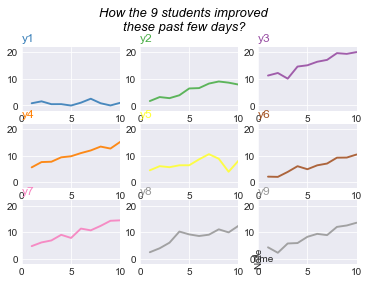

In [20]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14), 'y9': np.random.randn(10)+range(4,14) })
 
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('x', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(0,10)
    plt.ylim(-2,22)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis title
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')


In [25]:
float
float(1)


1.0

In [21]:
%%html
<a href="https:///1drv.ms/u/s!AsBZm0xIdgPArU8EVBtXQ8jFhzwI?e=AwBaUM">Pivot Table</a>

In [22]:
from IPython.display import HTML
import json
import pandas as pd

In [23]:
def pivot(webdatarocks_json_object):
    
    code = '''
      <link href="https://cdn.webdatarocks.com/latest/webdatarocks.min.css" rel="stylesheet"/>
      <script src="https://cdn.webdatarocks.com/latest/webdatarocks.toolbar.min.js"></script>
      <script src="https://cdn.webdatarocks.com/latest/webdatarocks.js"></script>
      <h1>Table1</h1>
      <div id="pivot-container1"></div>
      <script>
      new WebDataRocks({0});
      </script>
      '''.format(webdatarocks_json_object)
    return HTML(code)

In [25]:
import pandas as pd
df = pd.DataFrame([['Apple pie', '20'], ['Lemon cake', '30']], index=['row 1', 'row 2'], columns=['Product', 'Quantity'])
json_data = df.to_json(orient='records')



# Define WebDataRocks

webdatarocks = {
    "container": "#pivot-container1",
    "width": "50%",
    "height": 200,
    "toolbar": True,
    "report": {
        "dataSource": {
            "type": "json",
            "data": json.loads(json_data)
        },
        "slice": {
            "rows": [
                {
                    "uniqueName": "Product"
                }
            ],
            "columns": [
                {
                    "uniqueName": "[Measures]"
                }
            ],
            "measures": [
                {
                    "uniqueName": "Quantity",
                    "aggregation": "sum"
                }
            ]
        }
    }
}


# convert into JSON:
webdatarocks_json_object = json.dumps(webdatarocks)

# display:
pivot(webdatarocks_json_object)

In [16]:
df.head()

,Product,Quantity
row 1,Apple pie,20
row 2,Lemon cake,30


In [26]:
import pandas as pd
df = pd.read_excel("F:/Seagate Backup Plus Drive/test2.xlsx")

from pivottablejs import pivot_ui
pivot_ui(df)
#pivot_ui(df, outfile_path="F:/Seagate Backup Plus Drive/test3.html")
#print (df.to_html())


In [27]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>JS Pivot</title>
    <link rel='stylesheet' href='https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.23.0/pivot.min.css'>
    <script src='https://cdnjs.cloudflare.com/ajax/libs/jquery/3.4.1/jquery.min.js'></script>
    <script src='https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js'></script>
    <script src='https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.23.0/pivot.min.js'></script>
    <script src='https://cdn.plot.ly/plotly-basic-latest.min.js'></script>
    <script src='https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.22.0/plotly_renderers.min.js'></script>

</head>
<body>
<div style="margin: 1em;" id="output"></div>

<script>
    var salesPivotData = [
        {
            "Region": "Australia and Oceania",
            "Country": "Kiribati",
            "Item Type": "Cereal",
            "Sales Channel": "Offline",
            "Order Priority": "L",
            "Order Date": "7/24/2012",
            "Order ID": 905392587,
            "Ship Date": "8/16/2012",
            "Units Sold": 4641,
            "Unit Price": 205.7,
            "Unit Cost": 117.11,
            "Total Revenue": 954653.7,
            "Total Cost": 543507.51,
            "Total Profit": 411146.19 },

        {
            "Region": "Asia",
            "Country": "Cambodia",
            "Item Type": "Snacks",
            "Sales Channel": "Online",
            "Order Priority": "C",
            "Order Date": "3/25/2012",
            "Order ID": 990708720,
            "Ship Date": "5/4/2012",
            "Units Sold": 1581,
            "Unit Price": 152.58,
            "Unit Cost": 97.44,
            "Total Revenue": 241228.98,
            "Total Cost": 154052.64,
            "Total Profit": 87176.34 },
    ];


    $("#output").pivotUI(
        salesPivotData, {
            rows: ["Country"],
            cols: [],
               renderers: $.extend(
                   $.pivotUtilities.renderers,
                   $.pivotUtilities.plotly_renderers,

               )
        });
</script>
</body>
</html>

SyntaxError: invalid syntax (<ipython-input-27-90dd789c8da8>, line 1)

In [28]:
import pandas as pd
df = pd.read_excel("F:/Seagate Backup Plus Drive/test2.xlsx")
#df = pd.DataFrame([['Apple pie', '20'], ['Lemon cake', '30']], index=['row 1', 'row 2'], columns=['Product', 'Quantity'])
df

,Age Group,gender,ethnicity,Count
0,20-24,f,m,12
1,20-24,m,m,10
2,25-29,f,o,22
3,25-29,m,o,20


ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 
